In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

/Users/muskankhandelwal/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Image Data Preprocessing with `load_data` Function

This code defines a function, `load_data`, to preprocess and load image data from a specified folder path. The function reads images, converts them to RGB, resizes them to a consistent size, normalizes pixel values, and stores them as NumPy arrays. The function returns data and labels arrays. The example usage demonstrates loading data from a folder and printing the shapes of the resulting arrays.





In [3]:
def load_data(train_folder_path, target_size=(224, 224)):
    data = []
    labels = []

    classes = [class_name for class_name in os.listdir(train_folder_path) if not class_name.startswith('.')]
    
    for i, class_name in enumerate(classes):
        class_path = os.path.join(train_folder_path, class_name)
        images = [image for image in os.listdir(class_path) if not image.startswith('.')]

        for image_name in images:
            image_path = os.path.join(class_path, image_name)
            # Load the image data using PIL
            with Image.open(image_path) as img:
                # Convert the image to RGB
                img = img.convert('RGB')
                # Resize the image to a consistent size
                img = img.resize(target_size)
                # Convert the image to a NumPy array
                image_data = np.array(img)
                image_data = image_data / 255
            
            # Append image data and label to lists
            data.append(image_data)
            labels.append(i)

    data = np.array(data)
    labels = np.array(labels)
    print(data.shape, labels.shape)
    return data, labels

# Example usage
train_folder_path = "/Users/muskankhandelwal/Documents/SML/final_dataset_2/"
data, labels = load_data(train_folder_path)


(5954, 224, 224, 3) (5954,)


In [4]:
print(data, labels)

[[[[0.63921569 0.41568627 0.10588235]
   [0.63921569 0.41568627 0.10588235]
   [0.65098039 0.42745098 0.11764706]
   ...
   [0.62352941 0.17254902 0.17647059]
   [0.62352941 0.18039216 0.18039216]
   [0.61960784 0.18431373 0.18039216]]

  [[0.63921569 0.41568627 0.10588235]
   [0.63921569 0.41568627 0.10588235]
   [0.65098039 0.42745098 0.11764706]
   ...
   [0.62352941 0.16470588 0.16862745]
   [0.62745098 0.17254902 0.17647059]
   [0.62352941 0.18039216 0.18039216]]

  [[0.63529412 0.41176471 0.10196078]
   [0.64705882 0.42352941 0.11372549]
   [0.65098039 0.42745098 0.11764706]
   ...
   [0.6        0.13333333 0.14117647]
   [0.60784314 0.14509804 0.15294118]
   [0.60784314 0.15686275 0.16078431]]

  ...

  [[0.18823529 0.13333333 0.21960784]
   [0.15686275 0.10588235 0.18431373]
   [0.1372549  0.08627451 0.15686275]
   ...
   [0.35294118 0.30588235 0.56470588]
   [0.36470588 0.31764706 0.58039216]
   [0.37647059 0.32941176 0.58823529]]

  [[0.17647059 0.1254902  0.22352941]
   [0.1

In [54]:
labels

array([0, 0, 0, ..., 1, 1, 1])

### Loading and Splitting Image Data

This code snippet loads image data from a specified folder path, prints the shapes of the data and labels, and performs a train-test split using `train_test_split` from scikit-learn. The resulting shapes of the training and testing datasets are then printed in bold.
.

In [5]:
from sklearn.model_selection import train_test_split
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5954, 224, 224, 3) (5954,)
(4167, 224, 224, 3) (1787, 224, 224, 3) (4167,) (1787,)


In [56]:
y_train

array([0, 0, 0, ..., 0, 1, 0])

In [57]:
y_test

array([1, 0, 1, ..., 1, 1, 1])

In [6]:
 #Converting labels to categorical using one-hot encoding
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.applications import VGG16

# Converting labels to categorical using one-hot encoding
num_classes = len(np.unique(labels))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)
print(num_classes)
print(y_train.shape,y_test.shape)


2
(4167, 2) (1787, 2)


Here, we're using the VGG16 model pre-trained on ImageNet data and excluding its top layers to leverage the convolutional base.
This code constructs a new Sequential model using the pre-trained VGG16 layers as the base and adds fully connected layers on top for the classification task.
Compiling the model with the Adam optimizer and categorical cross-entropy loss. Then, training the model for 10 epochs with a batch size of 32 using the provided training and validation data.

In [10]:
from keras.applications import VGG16
# Load the VGG16 model without the top (fully connected) layers
vgg = VGG16(weights='imagenet', include_top=False,  input_shape=X_train.shape[1:])

# Freeze the convolutional base
for layer in vgg.layers:
    layer.trainable = False

# Create a new model on top of VGG16
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # Output layer for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
131/131 [==============================] - 716s 5s/step - loss: 0.7421 - accuracy: 0.7082 - val_loss: 0.4845 - val_accuracy: 0.7482
Epoch 2/10
131/131 [==============================] - 726s 6s/step - loss: 0.4514 - accuracy: 0.7852 - val_loss: 0.4158 - val_accuracy: 0.8131
Epoch 3/10
131/131 [==============================] - 960s 7s/step - loss: 0.3874 - accuracy: 0.8246 - val_loss: 0.3776 - val_accuracy: 0.8260
Epoch 4/10
131/131 [==============================] - 611s 5s/step - loss: 0.3623 - accuracy: 0.8339 - val_loss: 0.3838 - val_accuracy: 0.8360
Epoch 5/10
131/131 [==============================] - 618s 5s/step - loss: 0.3225 - accuracy: 0.8560 - val_loss: 0.3192 - val_accuracy: 0.8534
Epoch 6/10
131/131 [==============================] - 620s 5s/step - loss: 0.2670 - accuracy: 0.8793 - val_loss: 0.3057 - val_accuracy: 0.8719
Epoch 7/10
131/131 [==============================] - 601s 5s/step - loss: 0.2722 - accuracy: 0.8728 - val_loss: 0.3032 - val_accuracy: 0.8674

In [11]:
model.save("my_model_final.h5")

/Users/muskankhandelwal/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
from keras.models import load_model

# Load the model
loaded_model = load_model("my_model_final.h5")




In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Perform prediction on test data
y_pred_prob = loaded_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
print(y_pred)

56/56 [==============================] - 171s 3s/step
[[0 1]
 [1 0]
 [0 1]
 ...
 [0 1]
 [0 1]
 [0 1]]


In [12]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21137986 (80.64 MB)
Trainable params: 6423298 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [33]:
from tensorflow.keras.applications import VGG16

# Load VGG16 model without top (fully connected) layers
vgg16 = VGG16(weights='imagenet', include_top=False)

# Alternatively, loop through the layers to find the last convolutional layer
last_conv_layer = None
for layer in reversed(vgg16.layers):
    if 'conv' in layer.name:
        last_conv_layer = layer
        break

print("Last Convolutional Layer:", last_conv_layer.name)


Last Convolutional Layer: block5_conv3


### Model Evaluation

The code predicts labels (y_pred) and probabilities (y_pred_prob) using the trained model on the test set. The following evaluations are performed:

1. **Accuracy Calculation:**
   - Accuracy is computed using the predicted and actual labels on the test set.

2. **Classification Report:**
   - Displays precision, recall, and F1-score for each class.

3. **Confusion Matrix:**
   - Generates a confusion matrix with annotated values, providing insights into true and predicted values.

4. **F1 Score:**
   - Computes the F1 score as an additional performance metric.



56/56 [==============================] - 173s 3s/step
Model Accuracy on Test Set: 0.8746502518186905

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.83      0.87       906
           1       0.84      0.92      0.88       881

   micro avg       0.87      0.87      0.87      1787
   macro avg       0.88      0.88      0.87      1787
weighted avg       0.88      0.87      0.87      1787
 samples avg       0.87      0.87      0.87      1787

Confusion Matrix:
[[750 156]
 [ 68 813]]


Text(0.5, 606.7222222222223, 'Predicted Values')

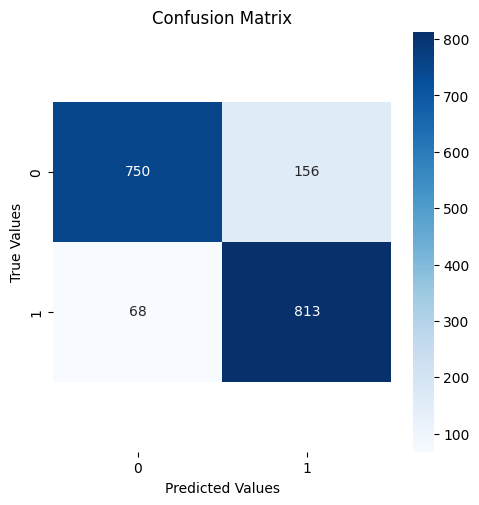

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Perform prediction on test data
y_pred_prob = loaded_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy on Test Set: {accuracy}')

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



y_pred_classes = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

plt.figure (figsize=(12,12))

plt.subplot (221)

sns.heatmap (conf_matrix, fmt = "d", annot=True, cmap='Blues')

b, t = plt.ylim()

plt.ylim (b + 0.5, t - 0.5)

plt.ylabel ('True Values')

plt.title ('Confusion Matrix')

plt.xlabel ('Predicted Values')
 



In [90]:
pip install shap


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### SHAP (SHapley Additive exPlanations) Analysis

The code utilizes the SHAP library to perform Shapley values analysis for interpretability on a deep learning model:

1. **Load Model:**
   - Loads the pre-trained model from the file "my_model_final.h5."

2. **Create SHAP DeepExplainer:**
   - Utilizes the SHAP DeepExplainer to create an explainer object using the loaded model and a subset of the training data (X_train[:10]) for explanation.

3. **Calculate SHAP Values:**
   - Computes SHAP values for a subset of test data (X_test[:5]).

4. **Visualize SHAP Values:**
   - Generates and displays SHAP value heatmaps for the chosen subset of test data.

This analysis aids in understanding the impact of different features on the model's predictions.


In [8]:
import shap


In [9]:
# Create an explainer object using the SHAP DeepExplainer
#explainer = shap.DeepExplainer(loaded_model, X_train[:100])  # Using a subset of training data for explanation
explainer = shap.DeepExplainer(loaded_model, X_train[:10])  # Using a subset of training data for explanation


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [10]:
# Calculate SHAP values
shap_values = explainer.shap_values(X_test[:5])  # Calculate SHAP values for a subset of test data


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


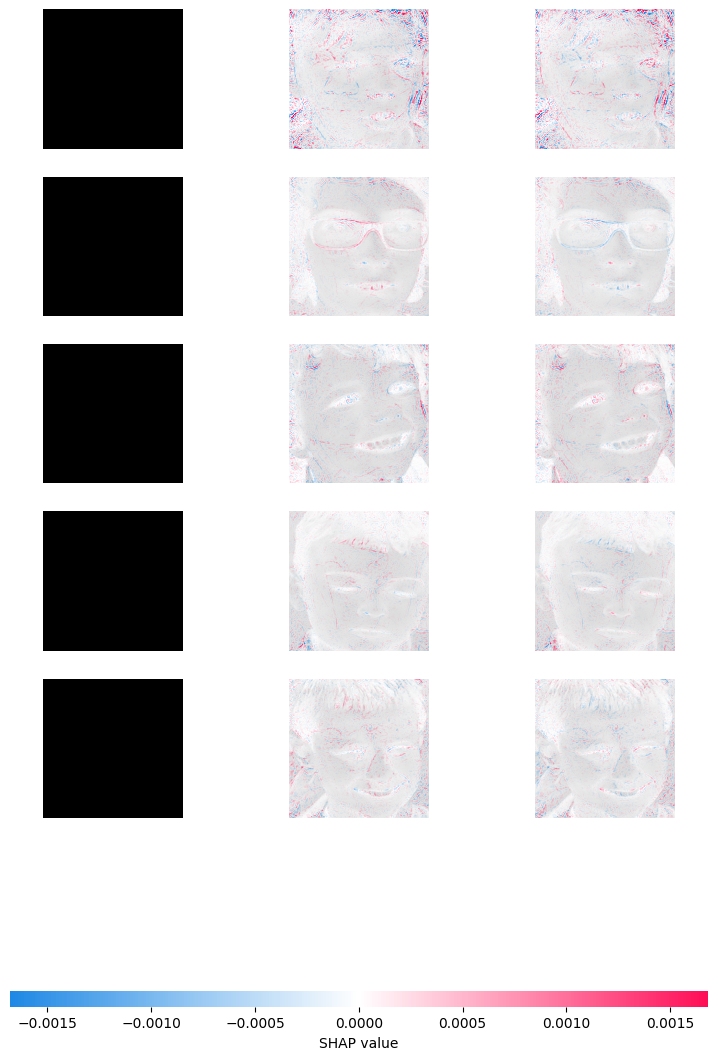

In [12]:
# Visualize the SHAP values as heatmaps
shap.image_plot(shap_values, -X_test[:5])  # Plot SHAP value heatmaps
